In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [2]:
data= pd.read_csv(r'C:\Users\HP\Desktop\3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

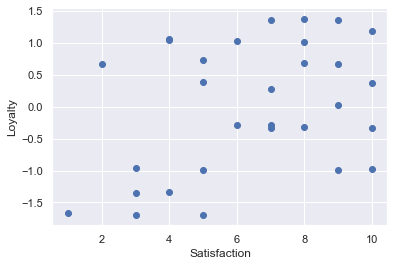

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [4]:
x=data.copy()

In [5]:
kmeans=KMeans(2)
kmeans=kmeans.fit(x)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
clusters=x.copy()
clusters['clusters_pre']=kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,clusters_pre
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

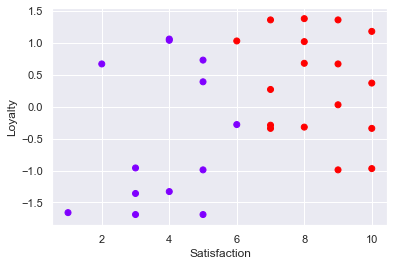

In [7]:
plt.scatter(clusters['Satisfaction'],data['Loyalty'],c=clusters['clusters_pre'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [8]:
#standardize the variables

In [9]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [10]:
wcss=[]

for i in range (1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[229.16347000000002,
 74.51511402714932,
 49.46793333333333,
 35.52453035714285,
 26.7682625,
 21.459241904761903,
 18.853783333333332,
 14.437368333333334,
 12.238346666666667]

Text(0, 0.5, 'wcss')

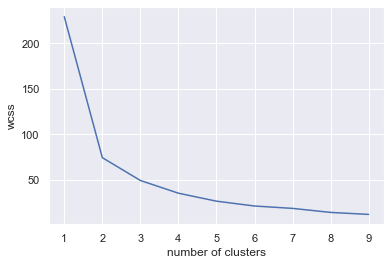

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [12]:
kmeans_new= KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new= x.copy()
clusters_new['clusters_pred']=kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,3
1,6,-0.28,1
2,5,-0.99,3
3,7,-0.29,1
4,4,1.06,2
5,1,-1.66,3
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

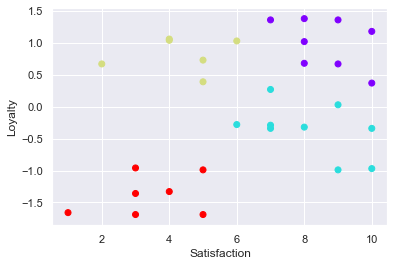

In [13]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')